<a href="https://colab.research.google.com/github/zafaralikhan2038/cyfuture/blob/main/zafar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cuda


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image for prompt: A futuristic city at sunset with flying cars


  0%|          | 0/50 [00:00<?, ?it/s]

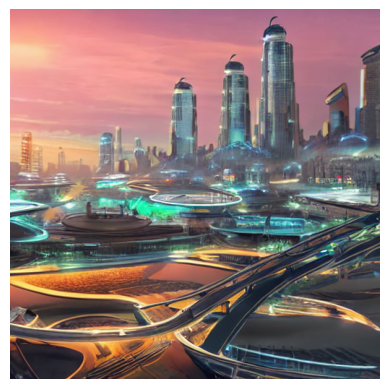

✅ Image saved as 'generated_image_1.png'
Generating image for prompt: A medieval castle surrounded by a mystical forest


  0%|          | 0/50 [00:00<?, ?it/s]

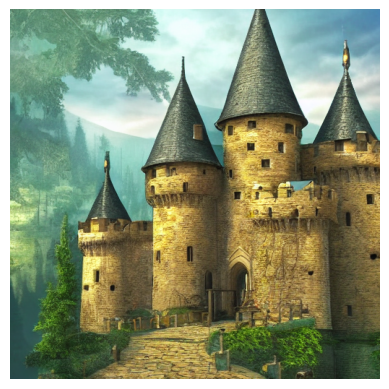

✅ Image saved as 'generated_image_2.png'
Generating image for prompt: A cyberpunk street filled with neon lights and rain


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


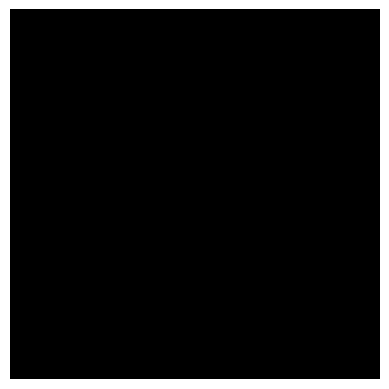

✅ Image saved as 'generated_image_3.png'
Generating image for prompt: A serene beach with crystal-clear water and palm trees


  0%|          | 0/50 [00:00<?, ?it/s]

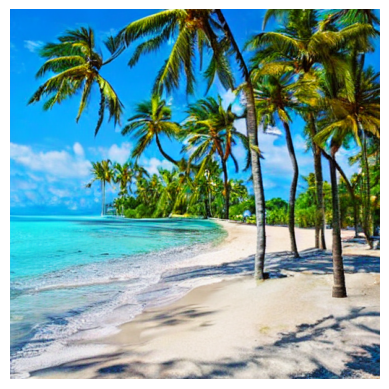

✅ Image saved as 'generated_image_4.png'
Generating image for prompt: A giant robot fighting a dragon in space


  0%|          | 0/50 [00:00<?, ?it/s]

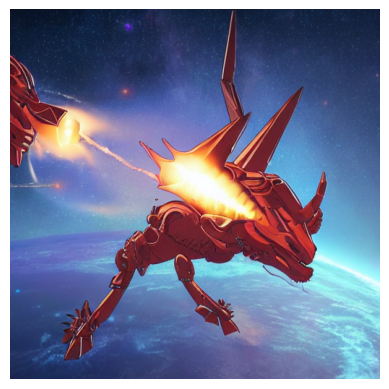

✅ Image saved as 'generated_image_5.png'
Generating image for prompt: An astronaut exploring an alien planet with strange creatures


  0%|          | 0/50 [00:00<?, ?it/s]

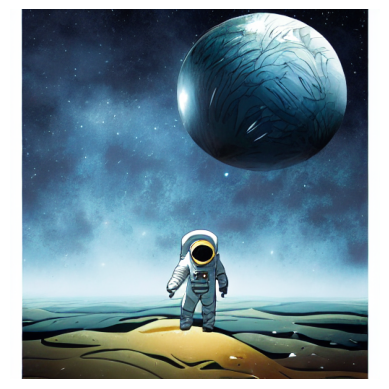

✅ Image saved as 'generated_image_6.png'


In [2]:
# Install required libraries (run this separately in a Colab cell)
!pip install diffusers transformers torch torchvision numpy matplotlib

import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load Stable Diffusion model (requires Hugging Face token for first-time use)
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe.to(device)

# Function to generate image from text
def generate_image(prompt, guidance_scale=7.5, num_inference_steps=50):
    print(f"Generating image for prompt: {prompt}")
    with torch.autocast(device):  # Enable automatic mixed precision
        image = pipe(prompt, guidance_scale=guidance_scale, num_inference_steps=num_inference_steps).images[0]
    return image

# Example prompts
prompts = [
    "A futuristic city at sunset with flying cars",
    "A medieval castle surrounded by a mystical forest",
    "A cyberpunk street filled with neon lights and rain",
    "A serene beach with crystal-clear water and palm trees",
    "A giant robot fighting a dragon in space",
    "An astronaut exploring an alien planet with strange creatures"
]

# Generate and save images for all prompts
for i, prompt in enumerate(prompts):
    generated_image = generate_image(prompt)
    plt.imshow(generated_image)
    plt.axis("off")
    plt.show()
    image_filename = f"generated_image_{i+1}.png"
    generated_image.save(image_filename)
    print(f"✅ Image saved as '{image_filename}'")